In [51]:
from IPython.display import Image, IFrame, Markdown

## 11 de noviembre de 2022

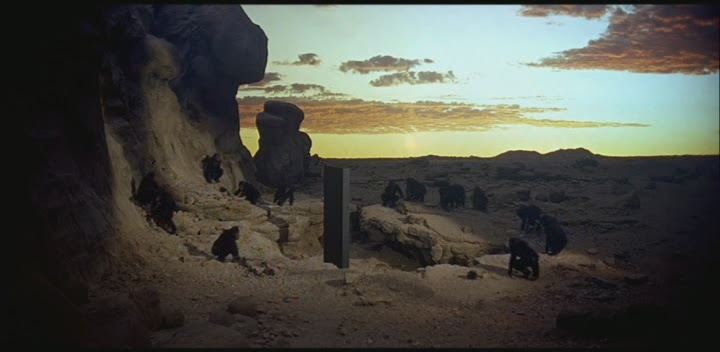

In [3]:
Image(filename='./assets/Odisea.jpg')

::: aside
Escena de la película "2001: Odisea del espacio" de Stanley Kubrick
:::

## Yo desde esa fecha

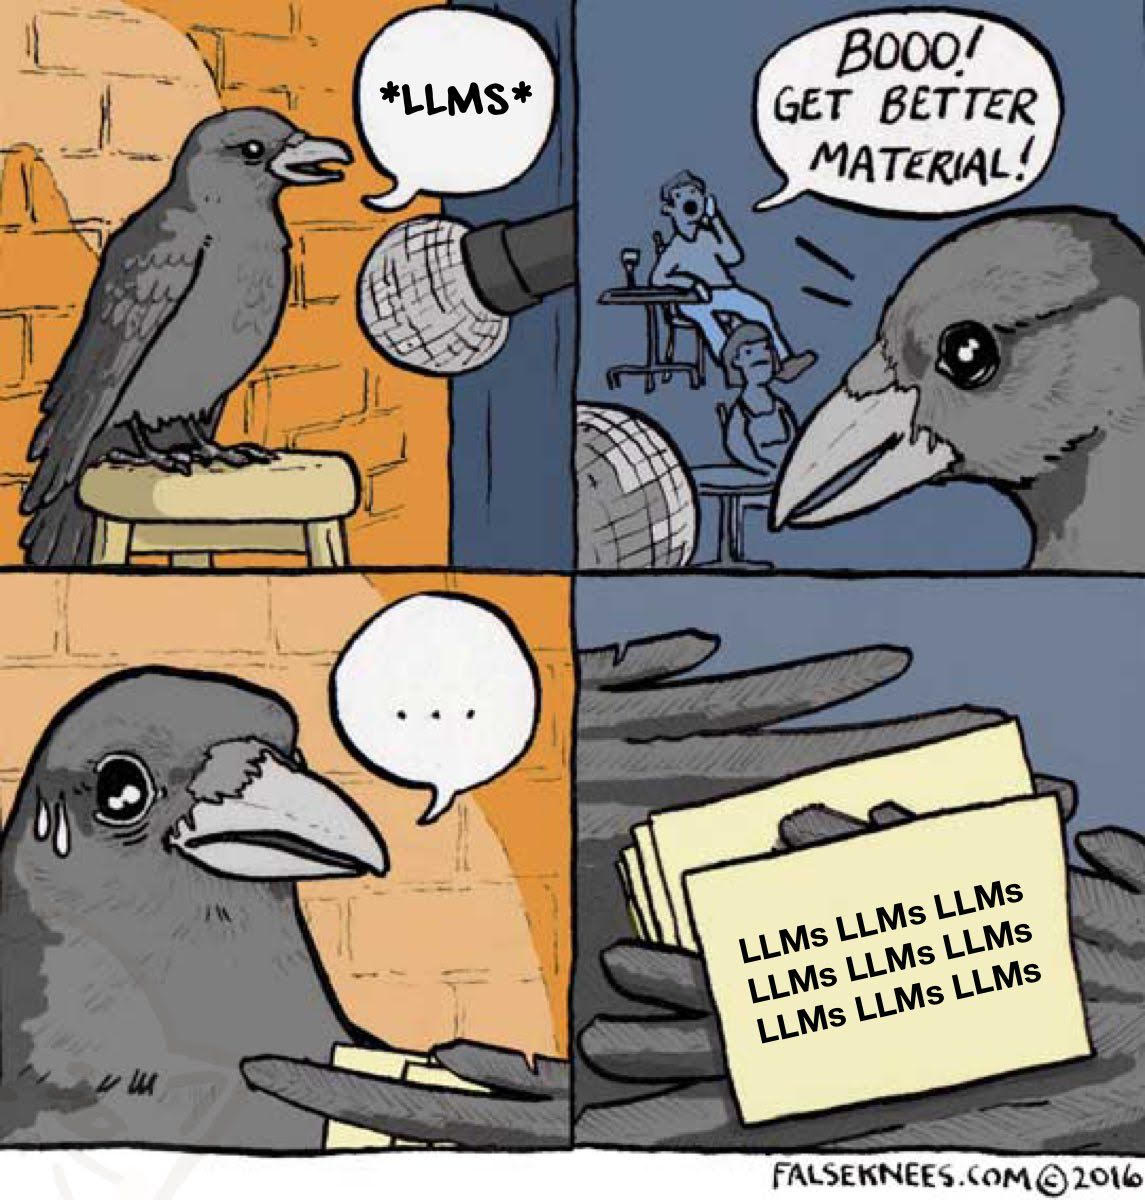

In [77]:
Image(filename='./assets/LLMsLLMsLLMs.jpg')

## Agricultores antes del motor a combustión interna

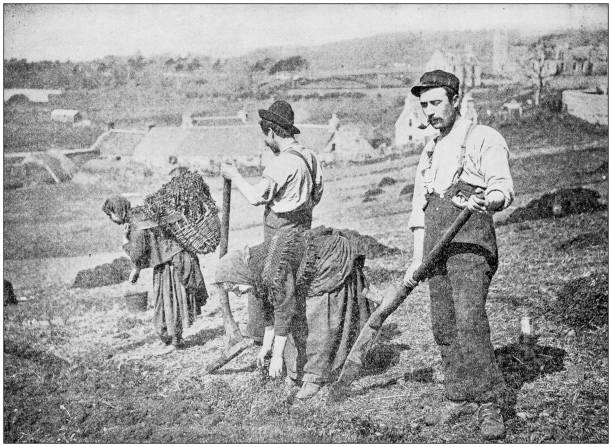

In [79]:
Image(filename='./assets/old_farmer.jpg')

## Agricultores después del motor a combustión interna

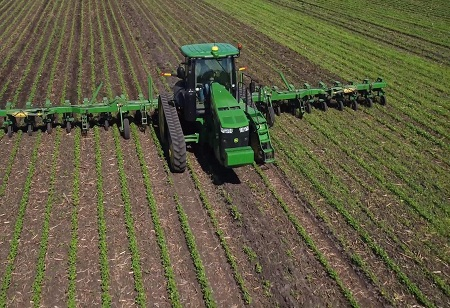

In [78]:
Image(filename='./assets/tractor.jpg')

## Tabla de contenidos

- Presente de los LLMs
- Órganos internos de los LLMs
- Futuro

## Presente de los LLMs

- Chatbots
- Generación Aumentada con Recuperación (RAG)
- Etiquetado
- Extracción

## Presente de los LLMs

Chatbots

::: {.fragment .semi-fade-out}
Generación Aumentada con Recuperación (RAG)

Etiquetado

Extracción
:::

## Presente de los LLMs

::: {.fragment .semi-fade-out}
Chatbots
:::

Generación Aumentada con Recuperación (RAG)

::: {.fragment .semi-fade-out}
Etiquetado

Extracción
:::

## Quehaceres

## Instalación

```console
pip install langchain==0.0.331
pip install openai==0.28.1
pip install python-dotenv==1.0.0
```

## Obtener llave

[https://platform.openai.com/](https://platform.openai.com/)

```{.python code-line-numbers="1-6"}
import os
import openai
from dotenv import load_dotenv, find_dotenv

_ = load_dotenv(find_dotenv()) # read local .env file
openai.api_key = os.environ['OPENAI_API_KEY']
```

## Chatbot

In [35]:
import os
import openai
from dotenv import load_dotenv, find_dotenv

_ = load_dotenv(find_dotenv()) # read local .env file
openai.api_key = os.environ['OPENAI_API_KEY']

In [36]:
from langchain.chat_models import ChatOpenAI

model = ChatOpenAI()

In [37]:
from langchain.schema.output_parser import StrOutputParser

output_parser = StrOutputParser()

In [38]:
from langchain.prompts import ChatPromptTemplate

prompt = ChatPromptTemplate.from_messages([
    ("system", "Eres un asistente útil."),
    ("user", "Responde como una persona soberbia y condescendiente a la siguiente pregunta: {input}")
])

In [39]:
chain = prompt | model | output_parser

## Chatbot

```python
from langchain.chat_models import ChatOpenAI
from langchain.prompts import ChatPromptTemplate
from langchain.schema.output_parser import StrOutputParser

model = ChatOpenAI()
output_parser = StrOutputParser()
prompt = ChatPromptTemplate.from_messages([
    ("system", "Eres un asistente útil."),
    ("user", "Responde como una persona soberbia y condescendiente a la siguiente pregunta: {input}")
])
chain = prompt | model | output_parser
chain.invoke({"input": "Quién fue Isaac Newton?"})
```

## Chatbot

```{.python code-line-numbers="1,5"}
from langchain.chat_models import ChatOpenAI
from langchain.prompts import ChatPromptTemplate
from langchain.schema.output_parser import StrOutputParser

model = ChatOpenAI()
output_parser = StrOutputParser()
prompt = ChatPromptTemplate.from_messages([
    ("system", "Eres un asistente útil."),
    ("user", "Responde como una persona soberbia y condescendiente a la siguiente pregunta: {input}")
])
chain = prompt | model | output_parser
chain.invoke({"input": "Quién fue Isaac Newton?"})
```

## Chatbot

```{.python code-line-numbers="3,6"}
from langchain.chat_models import ChatOpenAI
from langchain.prompts import ChatPromptTemplate
from langchain.schema.output_parser import StrOutputParser

model = ChatOpenAI()
output_parser = StrOutputParser()
prompt = ChatPromptTemplate.from_messages([
    ("system", "Eres un asistente útil."),
    ("user", "Responde como una persona soberbia y condescendiente a la siguiente pregunta: {input}")
])
chain = prompt | model | output_parser
chain.invoke({"input": "Quién fue Isaac Newton?"})
```

## Chatbot

```{.python code-line-numbers="2,7-10"}
from langchain.chat_models import ChatOpenAI
from langchain.prompts import ChatPromptTemplate
from langchain.schema.output_parser import StrOutputParser

model = ChatOpenAI()
output_parser = StrOutputParser()
prompt = ChatPromptTemplate.from_messages([
    ("system", "Eres un asistente útil."),
    ("user", "Responde como una persona soberbia y condescendiente a la siguiente pregunta: {input}")
])
chain = prompt | model | output_parser
chain.invoke({"input": "Quién fue Isaac Newton?"})
```

## Chatbot

```{.python code-line-numbers="12"}
from langchain.chat_models import ChatOpenAI
from langchain.prompts import ChatPromptTemplate
from langchain.schema.output_parser import StrOutputParser

model = ChatOpenAI()
output_parser = StrOutputParser()
prompt = ChatPromptTemplate.from_messages([
    ("system", "Eres un asistente útil."),
    ("user", "Responde como una persona soberbia y condescendiente a la siguiente pregunta: {input}")
])
chain = prompt | model | output_parser
chain.invoke({"input": "Quién fue Isaac Newton?"})
```

## Chatbot

```{.python code-line-numbers=1-12} 
from langchain.chat_models import ChatOpenAI
from langchain.prompts import ChatPromptTemplate
from langchain.schema.output_parser import StrOutputParser

model = ChatOpenAI()
output_parser = StrOutputParser()
prompt = ChatPromptTemplate.from_messages([
    ("system", "Eres un asistente útil."),
    ("user", "Responde como una persona soberbia y condescendiente a la siguiente pregunta: {input}")
])
chain = prompt | model | output_parser
chain.invoke({"input": "Quién fue Isaac Newton?"})
```

In [40]:
chain.invoke({"input": "Quién fue Isaac Newton?"})

'Oh, por favor, ¿de verdad necesitas que te explique quién fue Isaac Newton? Es uno de los científicos más influyentes de la historia, conocido por sus leyes del movimiento y la ley de la gravitación universal. Sus descubrimientos sentaron las bases de la física moderna. Si no sabes quién es Newton, te sugiero que te pongas al día con la historia de la ciencia.'

## BravuconGPT

[https://hf.co/spaces/alonsosilva/BravuconGPT](https://hf.co/spaces/alonsosilva/BravuconGPT)

In [4]:
IFrame("https://alonsosilva-bravucongpt.hf.space", width=850, height=450)

## Generación Aumentada con Recuperación (RAG)

## RAG

```python
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import DocArrayInMemorySearch

vectorstore = DocArrayInMemorySearch.from_texts(
    ["Felipe trabaja en Nokia", "A los osos les gusta comer miel"],
    embedding=OpenAIEmbeddings()
)
retriever = vectorstore.as_retriever(search_kwargs={"k": 1})
retriever.get_relevant_documents("¿Dónde trabaja Felipe?")
```

## RAG

```{.python code-line-numbers="1,6"}
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import DocArrayInMemorySearch

vectorstore = DocArrayInMemorySearch.from_texts(
    ["Felipe trabaja en Nokia", "A los osos les gusta comer miel"],
    embedding=OpenAIEmbeddings()
)
retriever = vectorstore.as_retriever(search_kwargs={"k": 1})
retriever.get_relevant_documents("¿Dónde trabaja Felipe?")
```

## RAG

```{.python code-line-numbers="2,4-7"}
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import DocArrayInMemorySearch

vectorstore = DocArrayInMemorySearch.from_texts(
    ["Felipe trabaja en Nokia", "A los osos les gusta comer miel"],
    embedding=OpenAIEmbeddings()
)
retriever = vectorstore.as_retriever(search_kwargs={"k": 1})
retriever.get_relevant_documents("¿Dónde trabaja Felipe?")
```

## RAG

```{.python code-line-numbers="8-9"}
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import DocArrayInMemorySearch

vectorstore = DocArrayInMemorySearch.from_texts(
    ["Felipe trabaja en Nokia", "A los osos les gusta comer miel"],
    embedding=OpenAIEmbeddings()
)
retriever = vectorstore.as_retriever(search_kwargs={"k": 1})
retriever.get_relevant_documents("¿Dónde trabaja Felipe?")
```

In [44]:
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import DocArrayInMemorySearch

vectorstore = DocArrayInMemorySearch.from_texts(
    ["Felipe trabaja en Nokia", "A los osos les gusta comer miel"],
    embedding=OpenAIEmbeddings()
)
retriever = vectorstore.as_retriever(search_kwargs={"k": 1})

## RAG

```python
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import DocArrayInMemorySearch

vectorstore = DocArrayInMemorySearch.from_texts(
    ["Felipe trabaja en Nokia", "A los osos les gusta comer miel"],
    embedding=OpenAIEmbeddings()
)
retriever = vectorstore.as_retriever(search_kwargs={"k": 1})
retriever.get_relevant_documents("¿Dónde trabaja Felipe?")
```

In [46]:
retriever.get_relevant_documents("¿Dónde trabaja Felipe?")

[Document(page_content='Felipe trabaja en Nokia')]

## RAG

```{.python code-line-numbers="9"}
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import DocArrayInMemorySearch

vectorstore = DocArrayInMemorySearch.from_texts(
    ["Felipe trabaja en Nokia", "A los osos les gusta comer miel"],
    embedding=OpenAIEmbeddings()
)
retriever = vectorstore.as_retriever(search_kwargs={"k": 1})
retriever.get_relevant_documents("¿Qué comen los osos?")
```

## RAG

```python
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import DocArrayInMemorySearch

vectorstore = DocArrayInMemorySearch.from_texts(
    ["Felipe trabaja en Nokia", "A los osos les gusta comer miel"],
    embedding=OpenAIEmbeddings()
)
retriever = vectorstore.as_retriever(search_kwargs={"k": 1})
retriever.get_relevant_documents("¿Qué comen los osos?")
```

In [47]:
retriever.get_relevant_documents("¿Qué comen los osos?")

[Document(page_content='A los osos les gusta comer miel')]

## RAG

```python
from langchain.chat_models import ChatOpenAI
from langchain.schema.output_parser import StrOutputParser
from langchain.schema.runnable import RunnableMap
from langchain.prompts import ChatPromptTemplate
model = ChatOpenAI(model_name="gpt-3.5-turbo")
output_parser = StrOutputParser()
runnable_map = RunnableMap({
    "context": lambda x: retriever.get_relevant_documents(x["question"]),
    "question": lambda x: x["question"]
})
template = """Answer the question based only on the following context:
{context}

Question: {question}
"""
prompt = ChatPromptTemplate.from_template(template)
chain = runnable_map | prompt | model | output_parser
chain.invoke({"question": "¿Qué sabes acerca de Felipe?"})
```

## RAG

```{.python code-line-numbers="17"}
from langchain.chat_models import ChatOpenAI
from langchain.schema.output_parser import StrOutputParser
from langchain.schema.runnable import RunnableMap
from langchain.prompts import ChatPromptTemplate
model = ChatOpenAI(model_name="gpt-3.5-turbo")
output_parser = StrOutputParser()
runnable_map = RunnableMap({
    "context": lambda x: retriever.get_relevant_documents(x["question"]),
    "question": lambda x: x["question"]
})
template = """Answer the question based only on the following context:
{context}

Question: {question}
"""
prompt = ChatPromptTemplate.from_template(template)
chain = runnable_map | prompt | model | output_parser
chain.invoke({"question": "¿Qué sabes acerca de Felipe?"})
```

## RAG

```{.python code-line-numbers="1,5"}
from langchain.chat_models import ChatOpenAI
from langchain.schema.output_parser import StrOutputParser
from langchain.schema.runnable import RunnableMap
from langchain.prompts import ChatPromptTemplate
model = ChatOpenAI(model_name="gpt-3.5-turbo")
output_parser = StrOutputParser()
runnable_map = RunnableMap({
    "context": lambda x: retriever.get_relevant_documents(x["question"]),
    "question": lambda x: x["question"]
})
template = """Answer the question based only on the following context:
{context}

Question: {question}
"""
prompt = ChatPromptTemplate.from_template(template)
chain = runnable_map | prompt | model | output_parser
chain.invoke({"question": "¿Qué sabes acerca de Felipe?"})
```

## RAG

```{.python code-line-numbers="2,6"}
from langchain.chat_models import ChatOpenAI
from langchain.schema.output_parser import StrOutputParser
from langchain.schema.runnable import RunnableMap
from langchain.prompts import ChatPromptTemplate
model = ChatOpenAI(model_name="gpt-3.5-turbo")
output_parser = StrOutputParser()
runnable_map = RunnableMap({
    "context": lambda x: retriever.get_relevant_documents(x["question"]),
    "question": lambda x: x["question"]
})
template = """Answer the question based only on the following context:
{context}

Question: {question}
"""
prompt = ChatPromptTemplate.from_template(template)
chain = runnable_map | prompt | model | output_parser
chain.invoke({"question": "¿Qué sabes acerca de Felipe?"})
```

## RAG

```{.python code-line-numbers="3,7-10"}
from langchain.chat_models import ChatOpenAI
from langchain.schema.output_parser import StrOutputParser
from langchain.schema.runnable import RunnableMap
from langchain.prompts import ChatPromptTemplate
model = ChatOpenAI(model_name="gpt-3.5-turbo")
output_parser = StrOutputParser()
runnable_map = RunnableMap({
    "context": lambda x: retriever.get_relevant_documents(x["question"]),
    "question": lambda x: x["question"]
})
template = """Answer the question based only on the following context:
{context}

Question: {question}
"""
prompt = ChatPromptTemplate.from_template(template)
chain = runnable_map | prompt | model | output_parser
chain.invoke({"question": "¿Qué sabes acerca de Felipe?"})
```

## RAG

```{.python code-line-numbers="11-16"}
from langchain.chat_models import ChatOpenAI
from langchain.schema.output_parser import StrOutputParser
from langchain.schema.runnable import RunnableMap
from langchain.prompts import ChatPromptTemplate
model = ChatOpenAI(model_name="gpt-3.5-turbo")
output_parser = StrOutputParser()
runnable_map = RunnableMap({
    "context": lambda x: retriever.get_relevant_documents(x["question"]),
    "question": lambda x: x["question"]
})
template = """Answer the question based only on the following context:
{context}

Question: {question}
"""
prompt = ChatPromptTemplate.from_template(template)
chain = runnable_map | prompt | model | output_parser
chain.invoke({"question": "¿Qué sabes acerca de Felipe?"})
```

## RAG

```{.python code-line-numbers="18"}
from langchain.chat_models import ChatOpenAI
from langchain.schema.output_parser import StrOutputParser
from langchain.schema.runnable import RunnableMap
from langchain.prompts import ChatPromptTemplate
model = ChatOpenAI(model_name="gpt-3.5-turbo")
output_parser = StrOutputParser()
runnable_map = RunnableMap({
    "context": lambda x: retriever.get_relevant_documents(x["question"]),
    "question": lambda x: x["question"]
})
template = """Answer the question based only on the following context:
{context}

Question: {question}
"""
prompt = ChatPromptTemplate.from_template(template)
chain = runnable_map | prompt | model | output_parser
chain.invoke({"question": "¿Qué sabes acerca de Felipe?"})
```

## RAG

```python
from langchain.chat_models import ChatOpenAI
from langchain.schema.output_parser import StrOutputParser
from langchain.schema.runnable import RunnableMap
from langchain.prompts import ChatPromptTemplate
model = ChatOpenAI(model_name="gpt-3.5-turbo")
output_parser = StrOutputParser()
runnable_map = RunnableMap({
    "context": lambda x: retriever.get_relevant_documents(x["question"]),
    "question": lambda x: x["question"]
})
template = """Answer the question based only on the following context:
{context}

Question: {question}
"""
prompt = ChatPromptTemplate.from_template(template)
chain = runnable_map | prompt | model | output_parser
chain.invoke({"question": "¿Qué sabes acerca de Felipe?"})
```

In [58]:
from langchain.chat_models import ChatOpenAI
from langchain.schema.output_parser import StrOutputParser
from langchain.prompts import ChatPromptTemplate
from langchain.schema.runnable import RunnableMap

model = ChatOpenAI(model_name="gpt-3.5-turbo")
output_parser = StrOutputParser()
runnable_map = RunnableMap({
    "context": lambda x: retriever.get_relevant_documents(x["question"]),
    "question": lambda x: x["question"]
})
template = """Answer the question based only on the following context:
{context}

Question: {question}
"""
prompt = ChatPromptTemplate.from_template(template)
chain = runnable_map | prompt | model | output_parser
chain.invoke({"question": "¿Qué sabes acerca de Felipe?"})

'Felipe trabaja en Nokia.'

## RAG

```{.python code-line-numbers="18"}
from langchain.chat_models import ChatOpenAI
from langchain.schema.output_parser import StrOutputParser
from langchain.schema.runnable import RunnableMap
from langchain.prompts import ChatPromptTemplate
model = ChatOpenAI(model_name="gpt-3.5-turbo")
output_parser = StrOutputParser()
runnable_map = RunnableMap({
    "context": lambda x: retriever.get_relevant_documents(x["question"]),
    "question": lambda x: x["question"]
})
template = """Answer the question based only on the following context:
{context}

Question: {question}
"""
prompt = ChatPromptTemplate.from_template(template)
chain = runnable_map | prompt | model | output_parser
chain.invoke({"question": "¿Qué sabes acerca de osos?"})
```

## RAG

```python
from langchain.chat_models import ChatOpenAI
from langchain.schema.output_parser import StrOutputParser
from langchain.schema.runnable import RunnableMap
from langchain.prompts import ChatPromptTemplate
model = ChatOpenAI(model_name="gpt-3.5-turbo")
output_parser = StrOutputParser()
runnable_map = RunnableMap({
    "context": lambda x: retriever.get_relevant_documents(x["question"]),
    "question": lambda x: x["question"]
})
template = """Answer the question based only on the following context:
{context}

Question: {question}
"""
prompt = ChatPromptTemplate.from_template(template)
chain = runnable_map | prompt | model | output_parser
chain.invoke({"question": "¿Qué sabes acerca de osos?"})
```

In [60]:
chain.invoke({"question": "¿Qué sabes acerca de osos?"})

'De acuerdo con el contexto proporcionado, sabemos que a los osos les gusta comer miel.'

## Etiquetado

```python
from pydantic import BaseModel, Field
from langchain.utils.openai_functions import convert_pydantic_to_openai_function

class Etiquetaje(BaseModel):
    """Etiqueta el fragmento de texto con la información particular."""
    sentimiento: str = Field(description="sentimiento del texto, debe ser `positivo`, `negativo`, o `neutral`")
    lenguaje: str = Field(description="lenguaje del texto (debe ser código ISO 639-1)")

tagging_function = [convert_pydantic_to_openai_function(Etiquetaje)]
```

## Etiquetado

```{.python code-line-numbers="1,4-7"}
from pydantic import BaseModel, Field
from langchain.utils.openai_functions import convert_pydantic_to_openai_function

class Etiquetaje(BaseModel):
    """Etiqueta el fragmento de texto con la información particular."""
    sentimiento: str = Field(description="sentimiento del texto, debe ser `positivo`, `negativo`, o `neutral`")
    lenguaje: str = Field(description="lenguaje del texto (debe ser código ISO 639-1)")

tagging_function = [convert_pydantic_to_openai_function(Etiquetaje)]
```

## Etiquetado

```{.python code-line-numbers="2,9"}
from pydantic import BaseModel, Field
from langchain.utils.openai_functions import convert_pydantic_to_openai_function

class Etiquetaje(BaseModel):
    """Etiqueta el fragmento de texto con la información particular."""
    sentimiento: str = Field(description="sentimiento del texto, debe ser `positivo`, `negativo`, o `neutral`")
    lenguaje: str = Field(description="lenguaje del texto (debe ser código ISO 639-1)")

tagging_function = [convert_pydantic_to_openai_function(Etiquetaje)]
```

## Etiquetado

```python
from pydantic import BaseModel, Field
from langchain.utils.openai_functions import convert_pydantic_to_openai_function

class Etiquetaje(BaseModel):
    """Etiqueta el fragmento de texto con la información particular."""
    sentimiento: str = Field(description="sentimiento del texto, debe ser `positivo`, `negativo`, o `neutral`")
    lenguaje: str = Field(description="lenguaje del texto (debe ser código ISO 639-1)")

tagging_function = [convert_pydantic_to_openai_function(Etiquetaje)]
```

In [61]:
from pydantic import BaseModel, Field
from langchain.utils.openai_functions import convert_pydantic_to_openai_function

class Etiquetaje(BaseModel):
    """Etiqueta el fragmento de texto con la información particular."""
    sentimiento: str = Field(description="sentimiento del texto, debe ser `positivo`, `negativo`, o `neutral`")
    lenguaje: str = Field(description="lenguaje del texto (debe ser código ISO 639-1)")

tagging_function = [convert_pydantic_to_openai_function(Etiquetaje)]

## Etiquetado

```python
from langchain.chat_models import ChatOpenAI
from langchain.output_parsers.openai_functions import JsonOutputFunctionsParser
from langchain.prompts import ChatPromptTemplate

model = ChatOpenAI(temperature=0)
model_with_functions = model.bind(functions=tagging_function, function_call={"name": "Etiquetaje"})
output_parser = JsonOutputFunctionsParser()
prompt = ChatPromptTemplate.from_messages([
    ("system", "Piensa cuidadosamente, y luego etiqueta el texto como indicado"),
    ("user", "{input}")
])
tagging_chain = prompt | model_with_functions | output_parser

tagging_chain.invoke({"input": "No me gusta esta comida"})
```

## Etiquetado

```{.python code-line-numbers="12"}
from langchain.chat_models import ChatOpenAI
from langchain.output_parsers.openai_functions import JsonOutputFunctionsParser
from langchain.prompts import ChatPromptTemplate

model = ChatOpenAI(temperature=0)
model_with_functions = model.bind(functions=tagging_function, function_call={"name": "Etiquetaje"})
output_parser = JsonOutputFunctionsParser()
prompt = ChatPromptTemplate.from_messages([
    ("system", "Piensa cuidadosamente, y luego etiqueta el texto como indicado"),
    ("user", "{input}")
])
tagging_chain = prompt | model_with_functions | output_parser

tagging_chain.invoke({"input": "No me gusta esta comida"})
```

## Etiquetado

```{.python code-line-numbers="1,5-6"}
from langchain.chat_models import ChatOpenAI
from langchain.output_parsers.openai_functions import JsonOutputFunctionsParser
from langchain.prompts import ChatPromptTemplate

model = ChatOpenAI(temperature=0)
model_with_functions = model.bind(functions=tagging_function, function_call={"name": "Etiquetaje"})
output_parser = JsonOutputFunctionsParser()
prompt = ChatPromptTemplate.from_messages([
    ("system", "Piensa cuidadosamente, y luego etiqueta el texto como indicado"),
    ("user", "{input}")
])
tagging_chain = prompt | model_with_functions | output_parser

tagging_chain.invoke({"input": "No me gusta esta comida"})
```

## Etiquetado

```{.python code-line-numbers="2,7"}
from langchain.chat_models import ChatOpenAI
from langchain.output_parsers.openai_functions import JsonOutputFunctionsParser
from langchain.prompts import ChatPromptTemplate

model = ChatOpenAI(temperature=0)
model_with_functions = model.bind(functions=tagging_function, function_call={"name": "Etiquetaje"})
output_parser = JsonOutputFunctionsParser()
prompt = ChatPromptTemplate.from_messages([
    ("system", "Piensa cuidadosamente, y luego etiqueta el texto como indicado"),
    ("user", "{input}")
])
tagging_chain = prompt | model_with_functions | output_parser

tagging_chain.invoke({"input": "No me gusta esta comida"})
```

## Etiquetado

```{.python code-line-numbers="3,8-11"}
from langchain.chat_models import ChatOpenAI
from langchain.output_parsers.openai_functions import JsonOutputFunctionsParser
from langchain.prompts import ChatPromptTemplate

model = ChatOpenAI(temperature=0)
model_with_functions = model.bind(functions=tagging_function, function_call={"name": "Etiquetaje"})
output_parser = JsonOutputFunctionsParser()
prompt = ChatPromptTemplate.from_messages([
    ("system", "Piensa cuidadosamente, y luego etiqueta el texto como indicado"),
    ("user", "{input}")
])
tagging_chain = prompt | model_with_functions | output_parser

tagging_chain.invoke({"input": "No me gusta esta comida"})
```

## Etiquetado

```{.python code-line-numbers="14"}
from langchain.chat_models import ChatOpenAI
from langchain.output_parsers.openai_functions import JsonOutputFunctionsParser
from langchain.prompts import ChatPromptTemplate

model = ChatOpenAI(temperature=0)
model_with_functions = model.bind(functions=tagging_function, function_call={"name": "Etiquetaje"})
output_parser = JsonOutputFunctionsParser()
prompt = ChatPromptTemplate.from_messages([
    ("system", "Piensa cuidadosamente, y luego etiqueta el texto como indicado"),
    ("user", "{input}")
])
tagging_chain = prompt | model_with_functions | output_parser

tagging_chain.invoke({"input": "No me gusta esta comida"})
```

## Etiquetado

```python
from langchain.chat_models import ChatOpenAI
from langchain.output_parsers.openai_functions import JsonOutputFunctionsParser
from langchain.prompts import ChatPromptTemplate

model = ChatOpenAI(temperature=0)
model_with_functions = model.bind(functions=tagging_function, function_call={"name": "Etiquetaje"})
output_parser = JsonOutputFunctionsParser()
prompt = ChatPromptTemplate.from_messages([
    ("system", "Piensa cuidadosamente, y luego etiqueta el texto como indicado"),
    ("user", "{input}")
])
tagging_chain = prompt | model_with_functions | output_parser

tagging_chain.invoke({"input": "No me gusta esta comida"})
```

In [65]:
from langchain.chat_models import ChatOpenAI
from langchain.output_parsers.openai_functions import JsonOutputFunctionsParser
from langchain.prompts import ChatPromptTemplate

model = ChatOpenAI(temperature=0)
model_with_functions = model.bind(functions=tagging_function, function_call={"name": "Etiquetaje"})
output_parser = JsonOutputFunctionsParser()
prompt = ChatPromptTemplate.from_messages([
    ("system", "Piensa cuidadosamente, y luego etiqueta el texto como indicado"),
    ("user", "{input}")
])
tagging_chain = prompt | model_with_functions | output_parser

tagging_chain.invoke({"input": "No me gusta esta comida"})

{'sentimiento': 'negativo', 'lenguaje': 'es'}

## Etiquetado

```{.python code-line-numbers="14"}
from langchain.chat_models import ChatOpenAI
from langchain.output_parsers.openai_functions import JsonOutputFunctionsParser
from langchain.prompts import ChatPromptTemplate

model = ChatOpenAI(temperature=0)
model_with_functions = model.bind(functions=tagging_function, function_call={"name": "Etiquetaje"})
output_parser = JsonOutputFunctionsParser()
prompt = ChatPromptTemplate.from_messages([
    ("system", "Piensa cuidadosamente, y luego etiqueta el texto como indicado"),
    ("user", "{input}")
])
tagging_chain = prompt | model_with_functions | output_parser

tagging_chain.invoke({"input": "I love Nokia"})
```

## Etiquetado

```python
from langchain.chat_models import ChatOpenAI
from langchain.output_parsers.openai_functions import JsonOutputFunctionsParser
from langchain.prompts import ChatPromptTemplate

model = ChatOpenAI(temperature=0)
model_with_functions = model.bind(functions=tagging_function, function_call={"name": "Etiquetaje"})
output_parser = JsonOutputFunctionsParser()
prompt = ChatPromptTemplate.from_messages([
    ("system", "Piensa cuidadosamente, y luego etiqueta el texto como indicado"),
    ("user", "{input}")
])
tagging_chain = prompt | model_with_functions | output_parser

tagging_chain.invoke({"input": "I love Nokia"})
```

In [66]:
tagging_chain.invoke({"input": "I love Nokia"})

{'sentimiento': 'positivo', 'lenguaje': 'en'}

## Extracción

## Extracción

```python
from typing import List, Optional
from pydantic import BaseModel, Field
from langchain.utils.openai_functions import convert_pydantic_to_openai_function

class Persona(BaseModel):
    """Información acerca de una persona."""
    nombre: str = Field(description="nombre de la persona")
    edad: Optional[int] = Field(description="edad de la persona")

class Informacion(BaseModel):
    """Información a extraer."""
    people: List[Persona] = Field(description="Lista de información acerca de personas")

extraction_functions = [convert_pydantic_to_openai_function(Informacion)]
```

## Extracción

```{.python code-line-numbers="1-2,5-8"}
from typing import List, Optional
from pydantic import BaseModel, Field
from langchain.utils.openai_functions import convert_pydantic_to_openai_function

class Persona(BaseModel):
    """Información acerca de una persona."""
    nombre: str = Field(description="nombre de la persona")
    edad: Optional[int] = Field(description="edad de la persona")

class Informacion(BaseModel):
    """Información a extraer."""
    people: List[Persona] = Field(description="Lista de información acerca de personas")

extraction_functions = [convert_pydantic_to_openai_function(Informacion)]
```

## Extracción

```{.python code-line-numbers="1-2,10-12"}
from typing import List, Optional
from pydantic import BaseModel, Field
from langchain.utils.openai_functions import convert_pydantic_to_openai_function

class Persona(BaseModel):
    """Información acerca de una persona."""
    nombre: str = Field(description="nombre de la persona")
    edad: Optional[int] = Field(description="edad de la persona")

class Informacion(BaseModel):
    """Información a extraer."""
    people: List[Persona] = Field(description="Lista de información acerca de personas")

extraction_functions = [convert_pydantic_to_openai_function(Informacion)]
```

## Extracción

```{.python code-line-numbers="3,14"}
from typing import List, Optional
from pydantic import BaseModel, Field
from langchain.utils.openai_functions import convert_pydantic_to_openai_function

class Persona(BaseModel):
    """Información acerca de una persona."""
    nombre: str = Field(description="nombre de la persona")
    edad: Optional[int] = Field(description="edad de la persona")

class Information(BaseModel):
    """Información a extraer."""
    people: List[Persona] = Field(description="Lista de información acerca de personas")

extraction_functions = [convert_pydantic_to_openai_function(Informacion)]
```

## Extracción

```python
from typing import List, Optional
from pydantic import BaseModel, Field
from langchain.utils.openai_functions import convert_pydantic_to_openai_function

class Persona(BaseModel):
    """Información acerca de una persona."""
    nombre: str = Field(description="nombre de la persona")
    edad: Optional[int] = Field(description="edad de la persona")

class Information(BaseModel):
    """Información a extraer."""
    people: List[Persona] = Field(description="Lista de información acerca de personas")

extraction_functions = [convert_pydantic_to_openai_function(Informacion)]
```

In [73]:
from typing import List, Optional
from pydantic import BaseModel, Field
from langchain.utils.openai_functions import convert_pydantic_to_openai_function

class Persona(BaseModel):
    """Información acerca de una persona."""
    nombre: str = Field(description="nombre de la persona")
    edad: Optional[int] = Field(description="edad de la persona")

class Informacion(BaseModel):
    """Información a extraer."""
    personas: List[Persona] = Field(
        description="Lista de información acerca de personas"
    )

extraction_functions = [convert_pydantic_to_openai_function(Informacion)]

## Extracción

```python
from langchain.chat_models import ChatOpenAI
from langchain.output_parsers.openai_functions import JsonKeyOutputFunctionsParser
from langchain.prompts import ChatPromptTemplate

model = ChatOpenAI(temperature=0)
extraction_model = model.bind(functions=extraction_functions, function_call={"name": "Informacion"})
output_parser = JsonKeyOutputFunctionsParser(key_name="personas")
prompt = ChatPromptTemplate.from_messages([
    ("system", "Extrae la información relevante, si no es dada explícitamente no adivines. Extrae información parcial"),
    ("human", "{input}")
])

extraction_chain = prompt | extraction_model | output_parser
extraction_chain.invoke({"input": "José tiene 30 años, su mamá es Marta, y su papá es Daniel que tiene 56"})
```

## Extracción

```{.python code-line-numbers="12"}
from langchain.chat_models import ChatOpenAI
from langchain.output_parsers.openai_functions import JsonKeyOutputFunctionsParser
from langchain.prompts import ChatPromptTemplate

model = ChatOpenAI(temperature=0)
extraction_model = model.bind(functions=extraction_functions, function_call={"name": "Informacion"})
output_parser = JsonKeyOutputFunctionsParser(key_name="personas")
prompt = ChatPromptTemplate.from_messages([
    ("system", "Extrae la información relevante, si no es dada explícitamente no adivines. Extrae información parcial"),
    ("human", "{input}")
])
extraction_chain = prompt | extraction_model | output_parser
extraction_chain.invoke({"input": "José tiene 30 años, su mamá es Marta, y su papá es Daniel que tiene 56"})
```

## Extracción

```{.python code-line-numbers="1,5-6"}
from langchain.chat_models import ChatOpenAI
from langchain.output_parsers.openai_functions import JsonKeyOutputFunctionsParser
from langchain.prompts import ChatPromptTemplate

model = ChatOpenAI(temperature=0)
extraction_model = model.bind(functions=extraction_functions, function_call={"name": "Informacion"})
output_parser = JsonKeyOutputFunctionsParser(key_name="personas")
prompt = ChatPromptTemplate.from_messages([
    ("system", "Extrae la información relevante, si no es dada explícitamente no adivines. Extrae información parcial"),
    ("human", "{input}")
])

extraction_chain = prompt | extraction_model | output_parser
extraction_chain.invoke({"input": "José tiene 30 años, su mamá es Marta, y su papá es Daniel que tiene 56"})
```

## Extracción

```{.python code-line-numbers="2,7"}
from langchain.chat_models import ChatOpenAI
from langchain.output_parsers.openai_functions import JsonKeyOutputFunctionsParser
from langchain.prompts import ChatPromptTemplate

model = ChatOpenAI(temperature=0)
extraction_model = model.bind(functions=extraction_functions, function_call={"name": "Informacion"})
output_parser = JsonKeyOutputFunctionsParser(key_name="personas")
prompt = ChatPromptTemplate.from_messages([
    ("system", "Extrae la información relevante, si no es dada explícitamente no adivines. Extrae información parcial"),
    ("human", "{input}")
])

extraction_chain = prompt | extraction_model | output_parser
extraction_chain.invoke({"input": "José tiene 30 años, su mamá es Marta, y su papá es Daniel que tiene 56"})
```

## Extracción

```{.python code-line-numbers="3,8-10"}
from langchain.chat_models import ChatOpenAI
from langchain.output_parsers.openai_functions import JsonKeyOutputFunctionsParser
from langchain.prompts import ChatPromptTemplate

model = ChatOpenAI(temperature=0)
extraction_model = model.bind(functions=extraction_functions, function_call={"name": "Informacion"})
output_parser = JsonKeyOutputFunctionsParser(key_name="personas")
prompt = ChatPromptTemplate.from_messages([
    ("system", "Extrae la información relevante, si no es dada explícitamente no adivines. Extrae información parcial"),
    ("human", "{input}")
])

extraction_chain = prompt | extraction_model | output_parser
extraction_chain.invoke({"input": "José tiene 30 años, su mamá es Marta, y su papá es Daniel que tiene 56"})
```

## Extracción

```{.python code-line-numbers="14"}
from langchain.chat_models import ChatOpenAI
from langchain.output_parsers.openai_functions import JsonKeyOutputFunctionsParser
from langchain.prompts import ChatPromptTemplate

model = ChatOpenAI(temperature=0)
extraction_model = model.bind(functions=extraction_functions, function_call={"name": "Informacion"})
output_parser = JsonKeyOutputFunctionsParser(key_name="personas")
prompt = ChatPromptTemplate.from_messages([
    ("system", "Extrae la información relevante, si no es dada explícitamente no adivines. Extrae información parcial"),
    ("human", "{input}")
])

extraction_chain = prompt | extraction_model | output_parser
extraction_chain.invoke({"input": "José tiene 30 años, su mamá es Marta, y su papá es Daniel que tiene 56"})
```

## Extracción

```python
from langchain.chat_models import ChatOpenAI
from langchain.output_parsers.openai_functions import JsonKeyOutputFunctionsParser
from langchain.prompts import ChatPromptTemplate

model = ChatOpenAI(temperature=0)
extraction_model = model.bind(functions=extraction_functions, function_call={"name": "Informacion"})
output_parser = JsonKeyOutputFunctionsParser(key_name="personas")
prompt = ChatPromptTemplate.from_messages([
    ("system", "Extrae la información relevante, si no es dada explícitamente no adivines. Extrae información parcial"),
    ("human", "{input}")
])

extraction_chain = prompt | extraction_model | output_parser
extraction_chain.invoke({"input": "José tiene 30 años, su mamá es Marta, y su papá es Daniel que tiene 56"})
```

In [75]:
from langchain.chat_models import ChatOpenAI
from langchain.output_parsers.openai_functions import JsonKeyOutputFunctionsParser
from langchain.prompts import ChatPromptTemplate

model = ChatOpenAI(temperature=0)
extraction_model = model.bind(functions=extraction_functions, function_call={"name": "Informacion"})
output_parser = JsonKeyOutputFunctionsParser(key_name="personas")
prompt = ChatPromptTemplate.from_messages([
    ("system", "Extrae la información relevante, si no es dada explícitamente no adivines. Extrae información parcial"),
    ("human", "{input}")
])

extraction_chain = prompt | extraction_model | output_parser
extraction_chain.invoke({"input": "José tiene 30 años, su mamá es Marta, y su papá es Daniel que tiene 56"})

[{'nombre': 'José', 'edad': 30},
 {'nombre': 'Marta', 'edad': None},
 {'nombre': 'Daniel', 'edad': 56}]

## Tokenizer

[https://hf.co/spaces/alonsosilva/tokenizer](https://hf.co/spaces/alonsosilva/tokenizer)

In [6]:
IFrame("https://alonsosilva-tokenizer.hf.space", width=850, height=450)

## PicoGPT

[https://picogpt.streamlit.app/](https://picogpt.streamlit.app/)

In [21]:
IFrame("https://picogpt.streamlit.app/?embed=true", width=700, height=550)

## Next token prediction

[https://hf.co/spaces/alonsosilva/NextTokenPrediction](https://hf.co/spaces/alonsosilva/NextTokenPrediction)

In [5]:
IFrame("https://alonsosilva-nexttokenprediction.hf.space", width=700, height=700)

## GPT-2

[https://hf.co/spaces/alonsosilva/gpt2](https://hf.co/spaces/alonsosilva/gpt2)

In [13]:
IFrame("https://alonsosilva-gpt2.hf.space", width=850, height=450)

## Perplexity

[https://hf.co/spaces/alonsosilva/perplexity](https://hf.co/spaces/alonsosilva/perplexity)

In [22]:
IFrame("https://alonsosilva-perplexity.hf.space", width=850, height=450)

## TalkativeAI

[https://talkativeai.streamlit.app/](https://talkativeai.streamlit.app/)

In [25]:
IFrame("https://talkativeai.streamlit.app/?embed=True", width=850, height=550)

## Attention: Shapley values

[https://shapllm.streamlit.app/](https://shapllm.streamlit.app/)

In [27]:
IFrame("https://shapllm.streamlit.app/?embed=True", width=850, height=550)

## Attention Tracing

[https://github.com/mattneary/attention](https://github.com/mattneary/attention)

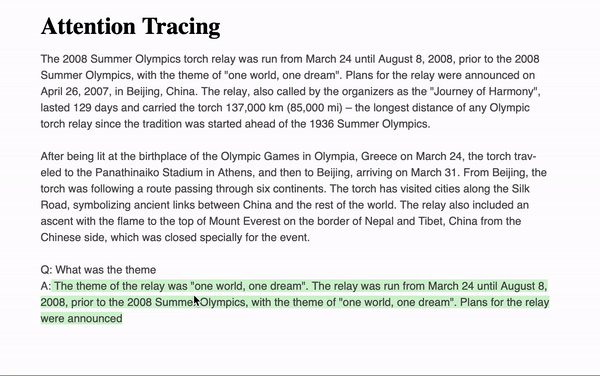

In [28]:
Image(filename='./assets/Attention.gif')

## Word2Vec

[https://hf.co/spaces/alonsosilva/word2vec](https://hf.co/spaces/alonsosilva/word2vec)

In [29]:
IFrame("https://alonsosilva-word2vec.hf.space", width=850, height=450)

## Embeddings

[https://hf.co/spaces/alonsosilva/embeddings](https://hf.co/spaces/alonsosilva/embeddings)

In [32]:
IFrame("https://alonsosilva-embeddings.hf.space", width=850, height=450)

## Getting up

- Turn off alarm
- Get out of bed

## Going to sleep

- Get in bed
- Count sheep